# NLM Reproducibility Workshop Team1

# Get processed matrix data from GEO
Read in the gene expression data sets.

In [ ]:
## Download microarray matrix files from GEO

setwd("~/NLM_Reproducibility_Workshop/tb_and_arthritis/data")

In [ ]:
url <- c("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE54nnn/GSE54992/matrix/GSE54992_series_matrix.txt.gz",
        "ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE19nnn/GSE19435/matrix/GSE19435_series_matrix.txt.gz",
        "ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE15nnn/GSE15573/matrix/GSE15573_series_matrix.txt.gz",
        "ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE19nnn/GSE19444/matrix/GSE19444_series_matrix.txt.gz",
        "ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE19nnn/GSE19435/matrix/GSE19435_series_matrix.txt.gz",
        "ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE65nnn/GSE65517/matrix/GSE65517_series_matrix.txt.gz")

In [ ]:
dest.file <- c("GSE54992_series_matrix.txt.gz","GSE19435_series_matrix.txt.gz","GSE15573_series_matrix.txt.gz",
              "GSE19444_series_matrix.txt.gz","GSE19435_series_matrix.txt.gz","GSE65517_series_matrix.txt.gz")

for (i in 1:length(url)){
utils::download.file(url[i], destfile=dest.file[i], mode="wb") 
}

# Prepare the input files into NetworkAnalyst Website

In [ ]:
## Run perl script to reformat the matrix and filter out low quality samples
## output *_series_matrix_networkanalyst.txt
## input reformated matrices into NetworkAnalyst Website

In [ ]:
## Meanwhile, read all matrices into R scripts below to analyze them by applying similar strategies.

In [ ]:
## Download and install different types of microarray annotation database files
working.dir <- "~/NLM_Reproducibility_Workshop/tb_and_arthritis/working"
setwd(working.dir)

install.packages("BiocManager")
BiocManager::install("plyr")
BiocManager::install("annotate")
BiocManager::install("illuminaHumanv4.db")
BiocManager::install("hgu133plus2.db")
BiocManager::install("illuminaHumanv2.db")
BiocManager::install("illuminaHumanv3.db")

In [57]:
library(annotate)
library(illuminaHumanv3.db)
library(illuminaHumanv2.db)
library(hgu133plus2.db)
library(illuminaHumanv4.db)
library(plyr)

Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:limma’:

    plotMA

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, whic

In [62]:
setwd("/home/ubuntu/NLM_Reproducibility_Workshop/tb_and_arthritis/working/")
getwd()

[1] "/home/ubuntu/NLM_Reproducibility_Workshop/tb_and_arthritis/working"

In [63]:
## read in each type of microarray annotation database
## test one by one and make sure the annotation file match with the dataset
## could loop them into a list object

dat.v2 <- read.delim("GSE15573_series_matrix_networkanalyst.txt")
id.v2 <- select(illuminaHumanv2.db, as.character(dat.v2[2:nrow(dat.v2),1]),
                c("SYMBOL","ENTREZID", "GENENAME"))

dat.v3.1 <- read.delim("GSE19435_series_matrix_networkanalyst.txt")
id.v3.1 <- select(illuminaHumanv3.db, as.character(dat.v3.1[2:nrow(dat.v3.1),1]),
                c("SYMBOL","ENTREZID", "GENENAME"))

dat.v3.2 <- read.delim("GSE19444_series_matrix_networkanalyst.txt")
id.v3.2 <- select(illuminaHumanv3.db, as.character(dat.v3.2[2:nrow(dat.v3.2),1]),
                  c("SYMBOL","ENTREZID", "GENENAME"))

dat.v4 <- read.delim("GSE65517_series_matrix_networkanalyst.txt")
id.v4 <- select(illuminaHumanv4.db, as.character(dat.v4[2:nrow(dat.v4),1]),
                c("SYMBOL","ENTREZID", "GENENAME"))

dat.plus2 <- read.delim("GSE4588_series_matrix_networkanalyst.txt")
id.plus2 <- select(hgu133plus2.db, as.character(dat.plus2[2:nrow(dat.plus2),1]),
                c("SYMBOL","ENTREZID", "GENENAME"))

dat.plus2.2 <- read.delim("GSE54992_series_matrix_networkanalyst.txt")
id.plus2.2 <- select(hgu133plus2.db, as.character(dat.plus2.2[2:nrow(dat.plus2.2),1]),
                c("SYMBOL","ENTREZID", "GENENAME"))


colnames(dat.v2)[1]=colnames(id.v2)[1]
dat.v2.all <- join(dat.v2,id.v2,by="PROBEID")

colnames(dat.v3.1)[1]=colnames(id.v3.1)[1]
dat.v3.1.all <- join(dat.v3.1,id.v3.1,by="PROBEID")

colnames(dat.v3.2)[1]=colnames(id.v3.2)[1]
dat.v3.2.all <- join(dat.v3.2,id.v3.2,by="PROBEID")

colnames(dat.v4)[1]=colnames(id.v4)[1]
dat.v4.all <- join(dat.v4,id.v4,by="PROBEID")

colnames(dat.plus2)[1]=colnames(id.plus2)[1]
dat.plus2.all <- join(dat.plus2,id.plus2,by="PROBEID")

colnames(dat.plus2.2)[1]=colnames(id.plus2.2)[1]
dat.plus2.2.all <- join(dat.plus2.2,id.plus2.2,by="PROBEID")

'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns


# Sample Filtering
The paper used some inclusion criteria to select samples from each study. Samples without class labels are thus removed from further analyses.

In [64]:
datasets <- list(dat.v2.all,dat.v3.1.all,dat.v3.2.all,dat.v4.all,dat.plus2.all,dat.plus2.2.all)
for (i in 1:length(datasets)) {
    dataset <- datasets[[i]]
    dataset[1,(ncol(dataset)-2):ncol(dataset)] <- "Metadata"
    cat("Removing",sum(is.na(dataset[1,])),"samples.\n")
    datasets[[i]] <- dataset[,!is.na(dataset[1,])]  
}

Removing 0 samples.
Removing 14 samples.
Removing 20 samples.
Removing 7 samples.
Removing 15 samples.
Removing 24 samples.


# Convert into gene-based matrices
Remove rows without gene mapping. Merge rows mapping to the same gene using the median values.

In [65]:
dataset.class <- data.frame()
for (i in 1:length(datasets)) {
    dataset <- datasets[[i]]
    dataset.class <- rbind(dataset.class,t(dataset[1,-c(1,(ncol(dataset)-2):ncol(dataset)),drop=F]))
    dataset <- dataset[-1,]
    cat("Number of rows without gene symbols:",sum(is.na(dataset$SYMBOL)),"\n")
    dataset <- subset(dataset,!is.na(dataset$SYMBOL))
    dataset.expr <- apply(dataset[,-c(1,(ncol(dataset)-2):ncol(dataset))],2,as.numeric)
    #print(head(dataset.expr))
    dataset <- aggregate(dataset.expr,
                         list(dataset$SYMBOL),median)
    rownames(dataset) <- dataset$Group.1
    cat("From",nrow(datasets[[i]]),"rows to",nrow(dataset),"rows\n")
    datasets[[i]] <- dataset
}

Number of rows without gene symbols: 23334 
From 50281 rows to 19718 rows
Number of rows without gene symbols: 18174 
From 50954 rows to 19933 rows
Number of rows without gene symbols: 18174 
From 50954 rows to 19933 rows
Number of rows without gene symbols: 11606 
From 50605 rows to 21625 rows
Number of rows without gene symbols: 10334 
From 58364 rows to 22012 rows
Number of rows without gene symbols: 10334 
From 58364 rows to 22012 rows


# Merge datasets
Merge all studies into one, keeping only the genes that appear in all studies

In [66]:
common.genes <- unlist(sapply(datasets,rownames))
common.genes <- table(common.genes)
common.genes <- names(common.genes)[common.genes == length(datasets)]
cat("Number of common genes:",length(common.genes),"\n")
merged.dataset <- data.frame()
for (i in 1:length(datasets)) {
    dataset <- datasets[[i]]
    if (max(dataset[,-1]) > 100) {
        tmp <- dataset[,-1]
        tmp[tmp <  0] <- 0
        dataset[,-1] <- log2(tmp+0.001)
    }
    cat(min(dataset[,-1]),":",max(dataset[,-1]),"\n")
    merged.dataset <- rbind(merged.dataset,t(dataset[common.genes,]))
}
merged.dataset <- cbind(dataset.class,merged.dataset[rownames(dataset.class),])
colnames(merged.dataset)[1] <- "#CLASS"  
#write.table(t(merged.dataset),file = "../data/merged.dataset.txt",sep="\t",quote = F,row.names = T,col.names = T)

Number of common genes: 18205 
6.413344 : 15.88771 
-9.965784 : 15.52916 
-9.965784 : 15.75623 
-9.965784 : 14.63469 
-9.965784 : 15.19165 
0 : 16.5385 


In [67]:
head(datasets[[4]])
head(dataset.class)

,Group.1,GSM1599181,GSM1599182,GSM1599183,GSM1599187,GSM1599188,GSM1599189
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG-AS1,A1BG-AS1,-13.812500,-3.020833,-3.770833,-4.0208335,-2.1875000,-2.937500
A1CF,A1CF,2.937500,4.062500,4.562500,-0.6041667,-0.7291667,7.354166
A2M,A2M,-2.187500,-0.062500,2.937500,2.9375000,-5.2708335,0.687500
A2ML1,A2ML1,2.145833,-6.145834,-3.812500,-2.1041667,-5.0625000,-3.020833
A4GALT,A4GALT,1.229167,-2.312500,-5.562500,-3.2708333,-8.8125000,-4.104166
A4GNT,A4GNT,8.020833,12.937500,4.562500,8.1041670,8.1458330,17.937500


,1
,<fct>
GSM389703,RA
GSM389704,RA
GSM389705,Healthy
GSM389706,RA
GSM389707,Healthy
GSM389708,RA


# Meta-Analysis
Used the MetaIntegrator package to run meta-analysis based on random-effect model. For each dataset, the expression values are quantile normalized and log2 transformed.

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


List of 5
 $ pheno        :'data.frame':	33 obs. of  1 variable:
 $ class        : Named num [1:33] 1 1 0 1 0 1 0 0 1 0 ...
  ..- attr(*, "names")= chr [1:33] "GSM389703" "GSM389704" "GSM389705" "GSM389706" ...
 $ keys         : Named chr [1:18205] "A1CF" "A2M" "A2ML1" "A4GALT" ...
  ..- attr(*, "names")= chr [1:18205] "A1CF" "A2M" "A2ML1" "A4GALT" ...
 $ formattedName: chr "Study.1"
 $ expr         : num [1:18205, 1:33] 7.35 7.25 7.71 7.44 7.63 ...
  ..- attr(*, "dimnames")=List of 2
List of 5
 $ pheno        :'data.frame':	19 obs. of  1 variable:
 $ class        : Named num [1:19] 0 0 0 0 0 0 0 0 0 0 ...
  ..- attr(*, "names")= chr [1:19] "GSM484368" "GSM484369" "GSM484370" "GSM484371" ...
 $ keys         : Named chr [1:18205] "A1CF" "A2M" "A2ML1" "A4GALT" ...
  ..- attr(*, "names")= chr [1:18205] "A1CF" "A2M" "A2ML1" "A4GALT" ...
 $ formattedName: chr "Study.2"
 $ expr         : num [1:18205, 1:19] 4.52 4.22 4.46 4.4 4.19 ...
  ..- attr(*, "dimnames")=List of 2
List of 5
 $ pheno   

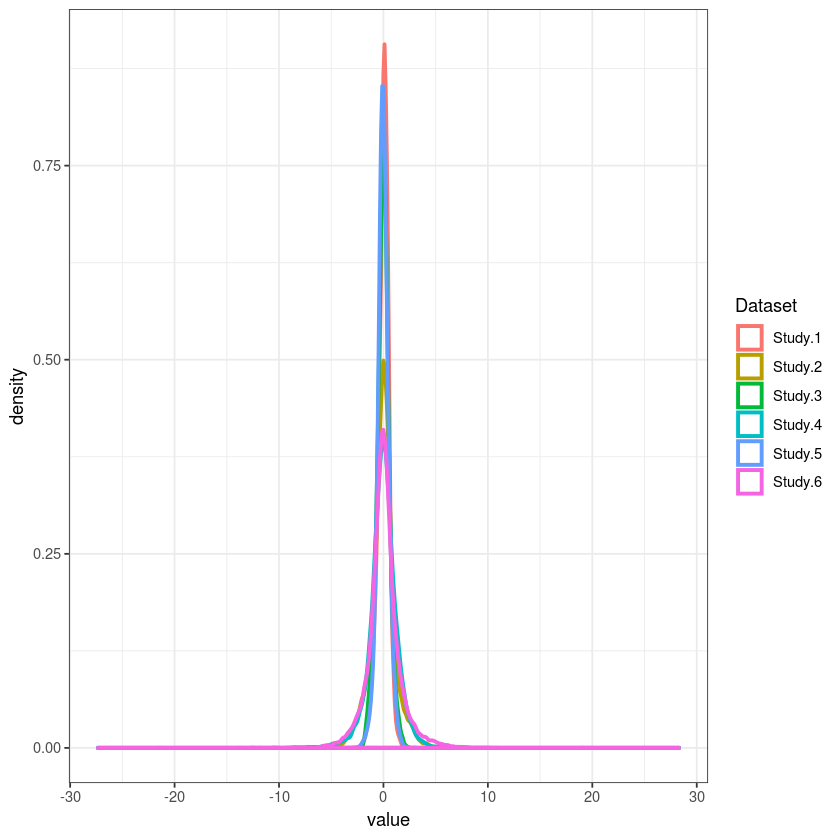

In [68]:
library("MetaIntegrator")
metaSet <- list()
# use the min expr across studies as offset for log2 transformation
min.expr <- min(unlist(lapply(datasets,function(x){min(x[common.genes,-1])})))
#print(min.expr)
for (i in 1:length(datasets)) {
    dataset <- datasets[[i]][common.genes,-1]
    # create data object
    dataObj <- list()
    dataObj$pheno <- data.frame(names=colnames(dataset),row.names = colnames(dataset))
    dataObj.class <- setNames(rep(0,ncol(dataset)),colnames(dataset))
    dataObj.class[as.character(dataset.class[colnames(dataset),1])!="Healthy"] <- 1
    dataObj$class <- dataObj.class
    dataObj$keys <- setNames(rownames(dataset),rownames(dataset))
    dataObj$formattedName <- paste0("Study.",i)
    expr <- as.matrix(dataset)
    # quantile normalization
    expr <- preprocessCore::normalize.quantiles(expr)
    rownames(expr) <- rownames(dataset)
    colnames(expr) <- colnames(dataset)
    # log2 transformation
    #print(min(expr))
    dataObj$expr <- log2(expr+abs(min.expr))
    #print(dim(dataObj$expr))
    if (checkDataObject(dataObj,"Dataset")) {
      metaSet[[i]] <- dataObj
      names(metaSet)[i] <- dataObj$formattedName
      str(metaSet[[i]], max.level = 1)  
    }
}
metaObj <- list(originalData = metaSet)
# run meta-analysis
metaObj <- runMetaAnalysis(metaObj,maxCores = 1)



In [71]:
res <- metaObj$metaAnalysis$pooledResults
res <- res[order(abs(res$effectSizeFDR),decreasing = F),]
cat("Number of genes with effect size FDR < 1%:",sum(res$effectSizeFDR < 0.01),"\n")
head(res,10)

Number of genes with effect size FDR < 1%: 312 


,effectSize,effectSizeStandardError,effectSizePval,effectSizeFDR,tauSquared,numStudies,cochranesQ,heterogeneityPval,fisherStatUp,fisherPvalUp,fisherFDRUp,fisherStatDown,fisherPvalDown,fisherFDRDown
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DDX24,-1.502206,0.2002638,6.326662e-14,1.151769e-09,0.0000000,6,3.576361,0.6118660,0.10925272,1.000000e+00,1.000000e+00,91.18825927,2.905905e-14,1.758618e-11
TLR5,1.437996,0.1976258,3.429542e-13,3.121740e-09,0.0000000,6,1.356191,0.9290449,85.48952451,3.664434e-13,6.753247e-11,0.07650714,1.000000e+00,1.000000e+00
MEPCE,-1.382137,0.1965761,2.049844e-12,1.243914e-08,0.0000000,6,4.079675,0.5380027,0.18974865,1.000000e+00,1.000000e+00,84.22729978,6.406350e-13,1.690255e-10
MEF2D,-1.321840,0.1947555,1.143479e-11,5.204259e-08,0.0000000,6,3.410428,0.6369822,0.07601953,1.000000e+00,1.000000e+00,79.68445225,4.740634e-12,8.298389e-10
CCR2,1.281868,0.1929276,3.046687e-11,1.109299e-07,0.0000000,6,4.086011,0.5371002,76.22575986,2.153707e-11,2.154299e-09,0.43828362,9.999999e-01,1.000000e+00
TNFSF10,1.934504,0.2957805,6.137999e-11,1.862371e-07,0.1904127,6,8.170639,0.1470788,120.68742635,4.507325e-20,1.367598e-16,0.04079610,1.000000e+00,1.000000e+00
CDKN2AIP,-1.210190,0.1904912,2.111560e-10,5.491564e-07,0.0000000,6,3.855119,0.5704583,1.11939525,9.999735e-01,1.000000e+00,70.41657789,2.676618e-10,2.331475e-08
NOP53,-1.194680,0.1907075,3.741071e-10,8.513275e-07,0.0000000,6,4.617482,0.4643203,0.43695664,9.999999e-01,1.000000e+00,71.57288095,1.624746e-10,1.509107e-08
KIAA0319L,1.178909,0.1899144,5.380722e-10,1.088401e-06,0.0000000,6,2.459626,0.7825628,67.97199366,7.657857e-10,4.678231e-08,0.21565870,1.000000e+00,1.000000e+00


In [76]:
dim(res)
rownames(res)[1:10]
class(rownames(res))
length(rownames(res))

[1] 18205    14

[1] "DDX24"     "TLR5"      "MEPCE"     "MEF2D"     "CCR2"      "TNFSF10"  
 [7] "CDKN2AIP"  "NOP53"     "KIAA0319L" "TENT4A"

[1] "character"

[1] 18205

In [87]:
## compare with top341 published gene list

#summary(rownames(res)[1:312]%in%as.character(sig341[,1]))
as.character(sig341[,1])[1:10]
summary(rownames(res)[1:312]%in%as.character(sig341[,1]))

[1] "DDX24"    "PPP1R16B" "ALG13"    "HNRNPH1"  "USP36"    "CDKN2AIP"
 [7] "MEPCE"    "SIAH1"    "PAPD7"    "CCDC84"

   Mode   FALSE    TRUE 
logical     121     191 

In [106]:
overlap <- intersect(rownames(res)[1:312],as.character(sig341[,1]))
#overlap.n <- vennCounts(overlap)


In [107]:
library(gplots)

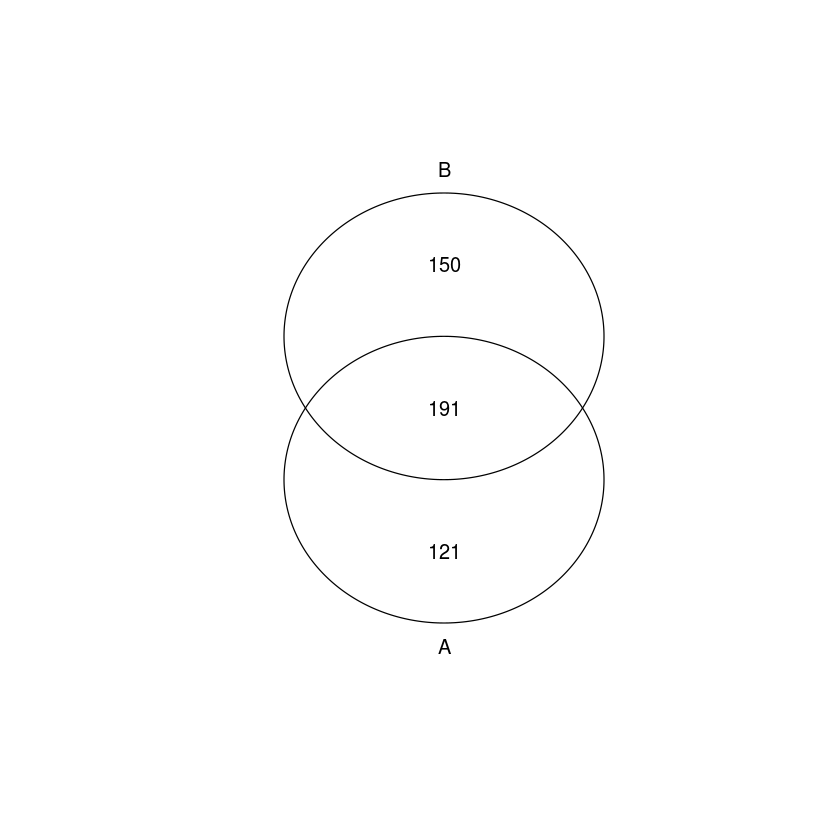

In [108]:
top312 <- rownames(res)[1:312]
top341 <- as.character(sig341[,1])
input <- list(top312,top341)

tmp <- venn(input)

In [99]:
?venn

# Differential Expression Genes Detection
Used sva, limma package to do Combat normalization to remove the batch factor and detected the differential expressed genes between disease and healthy groups based on regression model.

In [ ]:
### to do combat normalization

In [1]:
library(sva)
library(devtools)

Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.
Loading required package: genefilter
Loading required package: BiocParallel


In [55]:
#head(t(merged.dataset) # should save merged.dataset

In [ ]:
## continue working on merged datasets and following the similiar strategy

In [112]:
setwd("~/NLM_Reproducibility_Workshop/data")

In [113]:
merged.dataset <- read.delim("merged.dataset.txt")
head(merged.dataset)

,GSM389703,GSM389704,GSM389705,GSM389706,GSM389707,GSM389708,GSM389709,GSM389710,GSM389711,GSM389712,⋯,GSM1327531,GSM1327533,GSM1327535,GSM1327540,GSM1327541,GSM1327542,GSM1327544,GSM1327546,GSM1327549,GSM1327550
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
#CLASS,RA,RA,Healthy,RA,Healthy,RA,Healthy,Healthy,RA,Healthy,⋯,TB,TB,TB,TB,Healthy,Healthy,Healthy,Healthy,Healthy,Healthy
A1CF,7.141797,7.197045,7.122337,7.204903,7.189596,7.130171,7.042596,7.231972,7.227221,7.287982,⋯,4.02235335,4.51622020,2.85592080,4.49177415,4.406767750,5.57438430,5.318372000,5.03258470,5.20997165,5.22182185
A2M,7.029003,7.101189,7.096027,7.008570,6.996296,7.226256,7.125058,7.194374,7.143266,7.285384,⋯,6.02278985,4.07172385,4.90828205,6.31538965,6.036567950,5.87433620,5.158579000,6.26011845,5.47088145,6.20920705
A2ML1,7.575453,7.597774,7.717223,7.927268,7.408724,7.583378,7.642665,7.595066,7.627102,7.489733,⋯,5.71163700,4.86576620,3.53536070,4.53559050,3.854281250,3.64424540,3.364639650,4.76493950,3.78714480,2.92730750
A4GALT,7.246332,7.091080,7.216745,7.240897,7.107234,7.248818,7.088888,7.188603,7.143010,7.308314,⋯,6.25344470,4.41422700,4.06841950,5.36375500,5.151473500,5.66670130,2.955237200,6.26900500,3.58906750,2.78438200
A4GNT,7.480316,7.478925,7.369129,7.530114,7.534178,7.390891,7.447209,7.323019,7.483748,7.329446,⋯,5.42316100,6.60445500,4.83532240,6.46519800,6.735679600,4.68708040,4.022444700,6.59867600,6.96301360,6.53558700


In [114]:
merged.dataset2 <- merged.dataset[-1,]
grps <- as.character(as.matrix(merged.dataset[1,]))

merged.dataset.num <- round(apply(merged.dataset[-1,],2,as.numeric),2)
dim(merged.dataset.num)

grp <- c("Healthy","TB","RA")
#grp.all <- c(which(merged.dataset[1,]==grp[1]),which(merged.dataset[1,]==grp[2]),which(merged.dataset[1,]==grp[3]))
#length(grp.all)
#merged.dataset.num.rord <- merged.dataset.num[,grp.all]
#rownames(merged.dataset.num.rord)=rownames(merged.dataset)[-1]
#colnames(merged.dataset.num.rord)
cl <- rep(c("green","red","blue","purple","orange","yellow"),c(33,19,34,6,34,15))  ## find the numbers of the samples in each study

[1] 18205   141

In [215]:
# combat normalize crossing all batches samples
#merged.dataset.norm <- normalizeVSN(merged.dataset.num.rord)

design <- model.matrix(~ grps)
batches <- rep(c(1:6),c(33,19,34,6,34,15))


In [216]:
merged.dataset.norm <- ComBat(merged.dataset.num, batches, mod=design, par.prior=TRUE, prior.plots=FALSE)
rownames(merged.dataset.norm)=rownames(merged.dataset)[-1]

Found6batches
Adjusting for2covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data



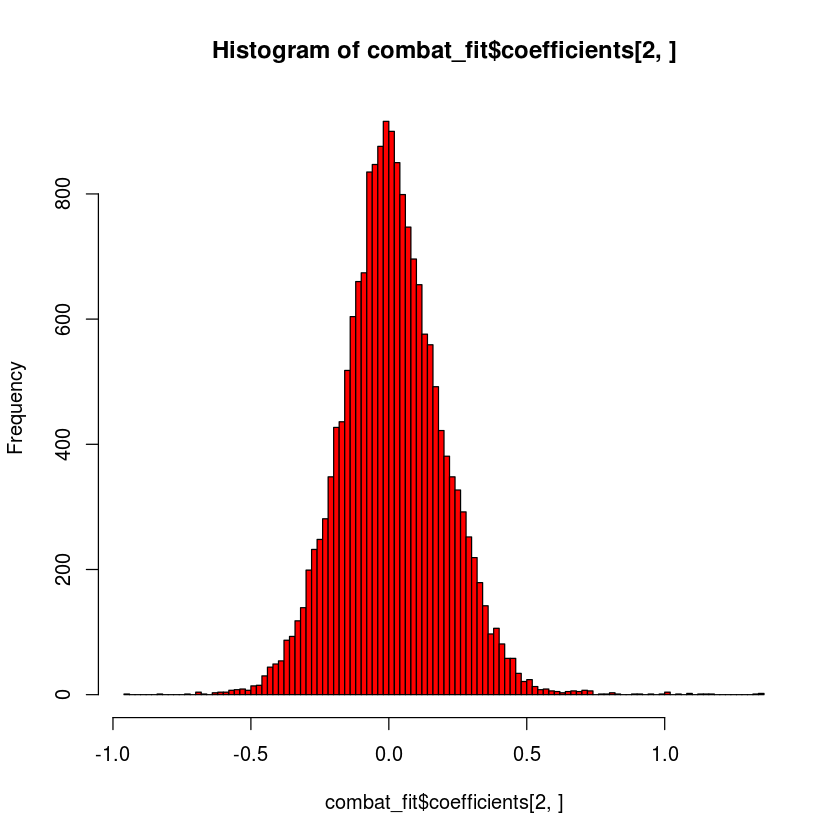

In [217]:
combat_fit = lm.fit(design,t(merged.dataset.norm))
par(mfrow=c(1,1))
hist(combat_fit$coefficients[2,],col=2,breaks=100)

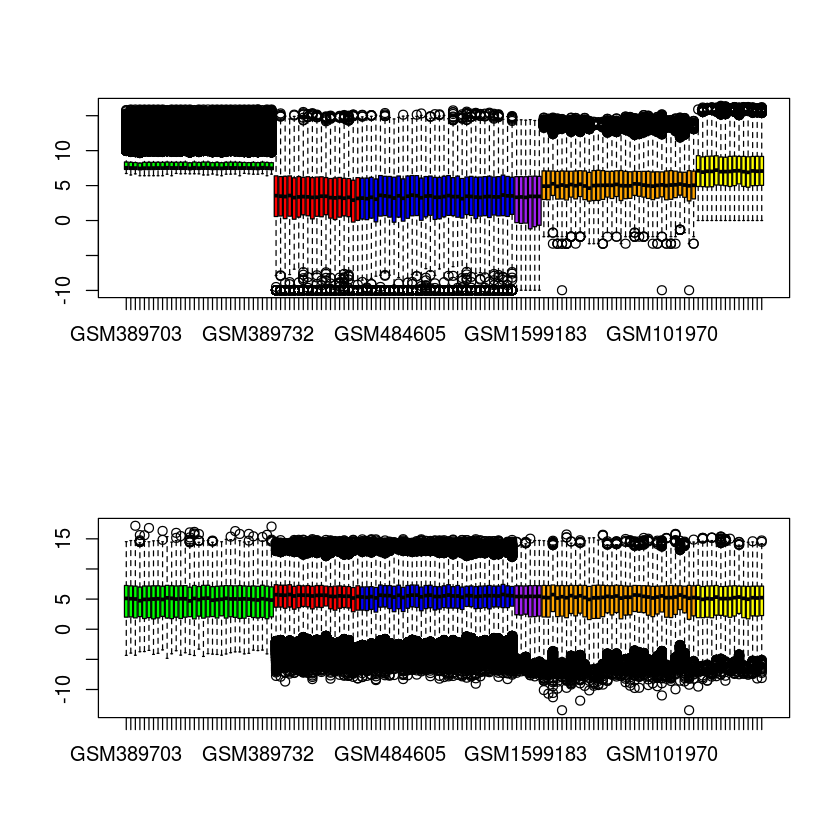

In [218]:
par(mfrow=c(2,1))
boxplot(merged.dataset.num, col=cl)
boxplot(merged.dataset.norm, col=cl)

In [197]:
## PCA analysis
merged.dataset.num.pca <- prcomp(t(merged.dataset.num))
merged.dataset.norm.pca <- prcomp(t(merged.dataset.norm))
merged.dataset.num.pca.proportionvariances <- ((merged.dataset.num.pca$sdev^2) / (sum(merged.dataset.num.pca$sdev^2)))*100
merged.dataset.norm.pca.proportionvariances <- ((merged.dataset.norm.pca$sdev^2) / (sum(merged.dataset.norm.pca$sdev^2)))*100

In [198]:
### Make PCA plots

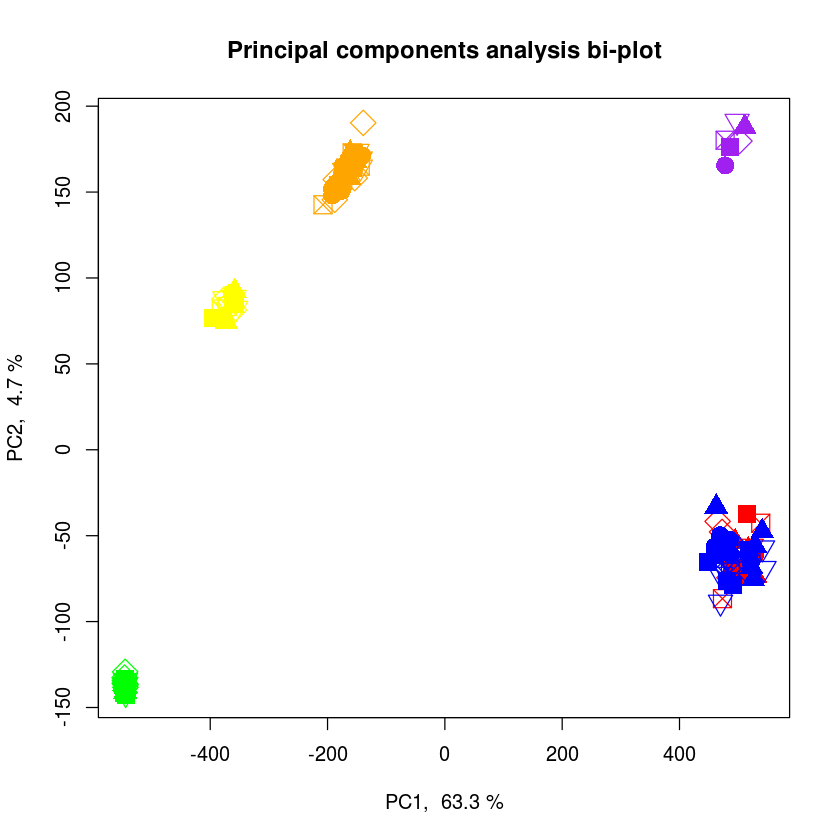

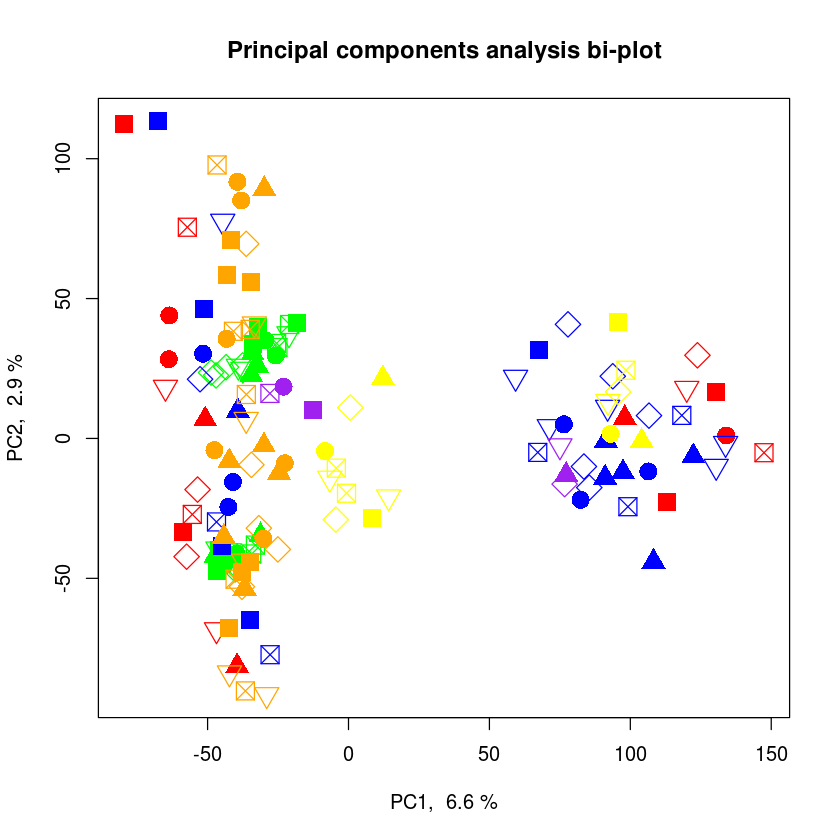

In [199]:
#plot(merged.dataset.num.pca$x)

plot(merged.dataset.num.pca$x, type="n", main="Principal components analysis bi-plot", 
     xlab=paste("PC1, ", round(merged.dataset.num.pca.proportionvariances[1], 1), "%"),
     ylab=paste("PC2, ", round(merged.dataset.num.pca.proportionvariances[2], 1), "%"))
points(merged.dataset.num.pca$x, col=cl, pch=c(5:7,15:17), cex=2)


#plot(merged.dataset.norm.pca$x)
plot(merged.dataset.norm.pca$x, type="n", main="Principal components analysis bi-plot", 
     xlab=paste("PC1, ", round(merged.dataset.norm.pca.proportionvariances[1], 1), "%"),
     ylab=paste("PC2, ", round(merged.dataset.norm.pca.proportionvariances[2], 1), "%"))
points(merged.dataset.norm.pca$x, col=cl, pch=c(5:7,15:17), cex=2)

In [125]:
head(merged.dataset.norm)
dim(merged.dataset.norm)

,GSM389703,GSM389704,GSM389705,GSM389706,GSM389707,GSM389708,GSM389709,GSM389710,GSM389711,GSM389712,⋯,GSM1327531,GSM1327533,GSM1327535,GSM1327540,GSM1327541,GSM1327542,GSM1327544,GSM1327546,GSM1327549,GSM1327550
A1CF,-1.4696041,-1.2182413,4.794944,-1.2182413,5.088201,-1.5114979,4.459794,5.255776,-1.0925598,5.507139,⋯,-0.2337752,1.451820,-4.144355,1.350684,-2.98403094,0.9265487,0.0837514,-0.8938935,-0.2870794,-0.2533675
A2M,-2.3948572,-2.1461068,4.218420,-2.4659287,3.863063,-1.6841419,4.325028,4.538242,-2.0039638,4.893600,⋯,2.6541166,-4.092276,-1.186138,3.692023,-0.92199171,-1.5101388,-3.9665176,-0.1608602,-2.8940142,-0.3338447
A2ML1,-2.7084309,-2.6347089,4.482424,-1.4182964,3.339733,-2.7084309,4.187536,4.040092,-2.5241260,3.634621,⋯,5.3505492,2.554737,-1.871966,1.456382,-1.76161894,-2.4605720,-3.3925094,1.2671776,-1.9613198,-4.8236990
A4GALT,-0.7076038,-1.3752625,5.606578,-0.7493325,5.147563,-0.7076038,5.064105,5.481392,-1.1666192,5.982136,⋯,5.8428890,1.570309,0.780810,3.776260,-0.05340981,1.1540586,-5.1387094,2.5472913,-3.6758150,-5.5566792
A4GNT,-0.7839083,-0.7839083,5.321666,-0.5720018,5.999767,-1.1653402,5.660716,5.109759,-0.7839083,5.152141,⋯,-0.4716101,3.330724,-2.340554,2.911823,4.71026884,-1.8954813,-4.0544338,4.2591444,5.4191786,4.0658054
AAAS,5.0009293,5.5035365,6.558826,4.1527798,5.930567,4.8124516,6.338936,6.621652,4.2156057,6.401762,⋯,3.9546125,3.531174,5.940069,6.833995,5.78320726,5.6232416,2.7062203,5.6985196,6.6677234,4.5693500


[1] 18205   141

In [200]:
library(limma)
design.limma <- model.matrix(~0+grps+batches)
design.limma
fit <- lmFit(merged.dataset.norm, design.limma)

contrast.matrix=makeContrasts(grpsRA - grpsHealthy, grpsTB - grpsHealthy,
                              (grpsRA + grpsTB) - grpsHealthy, levels=design.limma)
colnames(contrast.matrix)=c("RA_ctrl","TB_ctrl","RATB_ctrl")
fit.contrast=contrasts.fit(fit,contrast.matrix)
efit.contrast=eBayes(fit.contrast)

grpsHealthy,grpsRA,grpsTB,batches
0,1,0,1
0,1,0,1
1,0,0,1
0,1,0,1
1,0,0,1
0,1,0,1
1,0,0,1
1,0,0,1
0,1,0,1
1,0,0,1


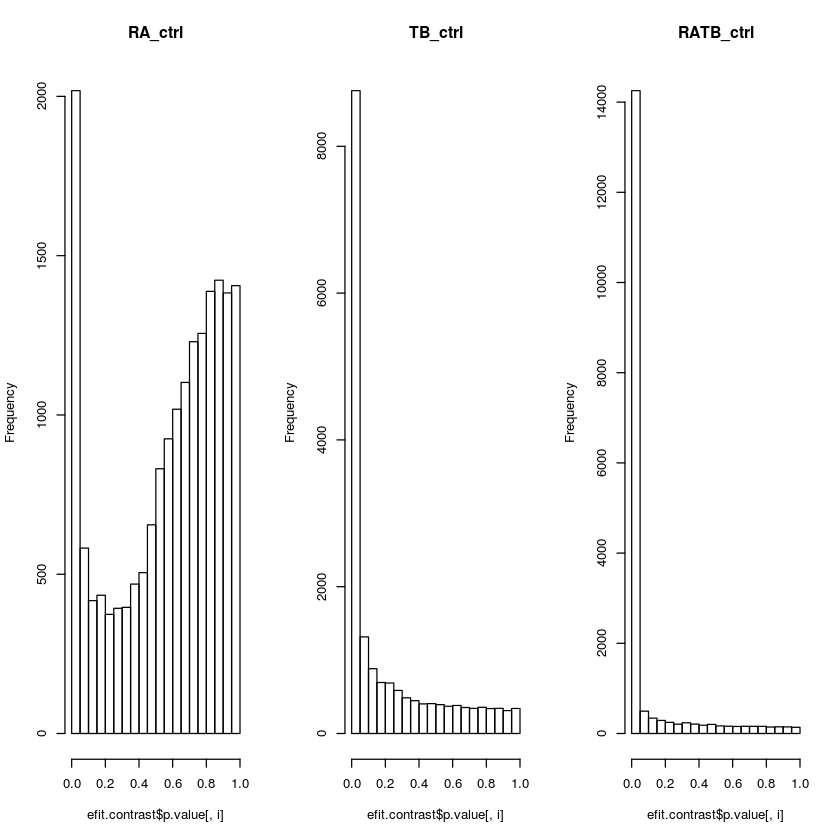

In [201]:
par(mfrow=c(1,3))
for (i in 1:ncol(efit.contrast$p.value)){
  hist(efit.contrast$p.value[,i],main=colnames(efit.contrast$p.value)[i])
}

In [177]:
table(grps)

grps
Healthy      RA      TB 
     67      33      41 

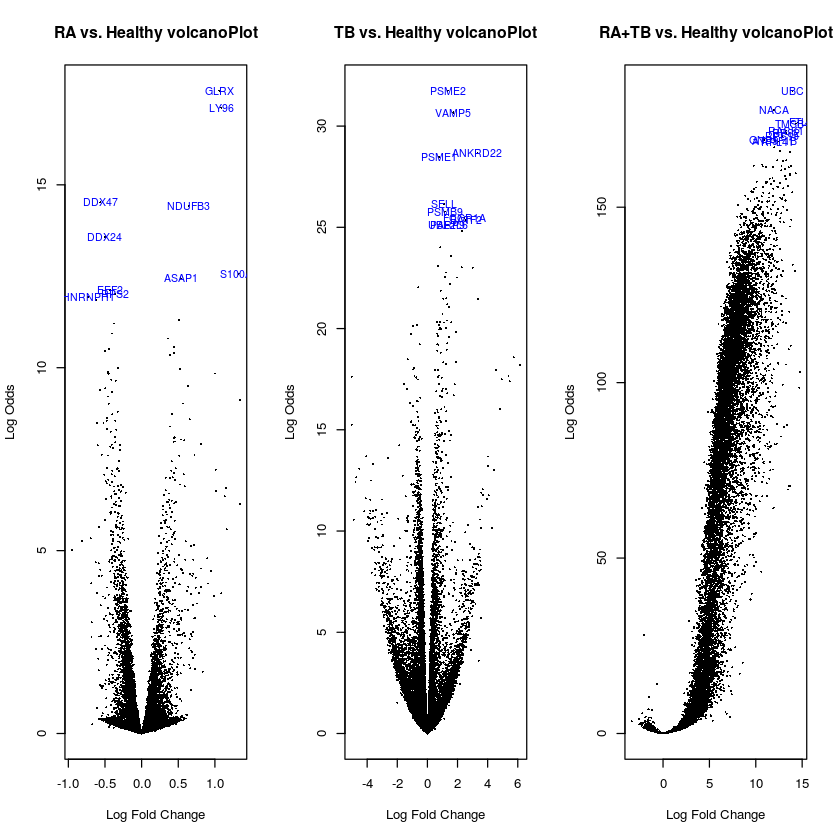

In [202]:
par(mfrow=c(1,3))
volcanoplot(efit.contrast, coef=1, highlight=10,names=rownames(efit.contrast), 
            xlab="Log Fold Change", ylab="Log Odds", pch=16,main="RA vs. Healthy volcanoPlot")
volcanoplot(efit.contrast, coef=2, highlight=10,names=rownames(efit.contrast), 
            xlab="Log Fold Change", ylab="Log Odds", pch=16,main="TB vs. Healthy volcanoPlot")
volcanoplot(efit.contrast, coef=3, highlight=10,names=rownames(efit.contrast), 
            xlab="Log Fold Change", ylab="Log Odds", pch=16,main="RA+TB vs. Healthy volcanoPlot")

In [203]:
topTable(efit.contrast,coef=1,adjust.method="BH",n=50,p.value=0.01)
topTable(efit.contrast,coef=2,adjust.method="BH",n=50,p.value=0.01)
topTable(efit.contrast,coef=3,adjust.method="BH",n=50,p.value=0.01)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GLRX,1.0582441,10.037408,10.097527,2.664185e-18,4.850148e-14,30.588293
LY96,1.0881667,10.058491,9.914521,7.786971e-18,7.088091e-14,29.572962
DDX47,-0.5658030,8.994862,-8.886093,3.019641e-15,1.687915e-11,23.923620
NDUFB3,0.6424793,9.488469,8.850179,3.708685e-15,1.687915e-11,23.728645
DDX24,-0.5025077,8.896089,-8.505017,2.643702e-14,9.625719e-11,21.865162
S100A8,1.3236106,13.353005,8.090548,2.711756e-13,8.227918e-10,19.655889
ASAP1,0.5322435,9.465980,8.039779,3.597368e-13,9.355726e-10,19.387682
EEF2,-0.4306340,12.424610,-7.904323,7.623721e-13,1.734873e-09,18.674897
RPS2,-0.3670900,13.776265,-7.861300,9.668703e-13,1.955764e-09,18.449383


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PSME2,1.3503591,10.692739,15.67645,1.780741e-32,3.241838e-28,62.99799
VAMP5,1.7285741,8.538739,15.23979,2.136943e-31,1.945152e-27,60.57401
ANKRD22,3.3198009,6.506523,14.43545,2.180571e-29,1.323243e-25,56.05746
PSME1,0.7834062,11.515355,14.36172,3.341437e-29,1.520771e-25,55.64040
SELL,1.1012045,11.741612,13.44171,7.121110e-27,2.592796e-23,50.39762
PSMB9,1.1421130,9.473688,13.29662,1.667636e-26,5.059885e-23,49.56502
FCGR1A,2.4473423,7.179467,13.17910,3.325148e-26,8.647760e-23,48.88968
BATF2,2.5674445,5.585200,13.13929,4.201626e-26,9.561324e-23,48.66071
UBE2L6,1.3532601,9.181860,13.03823,7.612034e-26,1.464567e-22,48.07908


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
UBC,13.931319,14.056750,243.1985,6.091876e-184,1.109026e-179,363.7257
NACA,11.963741,12.169337,221.6644,2.190517e-178,1.993918e-174,357.2376
FTL,14.602380,14.543194,209.1801,6.499166e-175,3.943910e-171,352.8809
TMSB4X,14.301972,14.457402,207.8176,1.600364e-174,7.283657e-171,352.3754
RACK1,13.221616,13.518982,200.8585,1.752805e-172,6.381964e-169,349.6940
RPS2,13.307125,13.776265,199.2539,5.295906e-172,1.606866e-168,349.0512
RPS15,12.837820,13.191098,195.6866,6.389415e-171,1.661704e-167,347.5877
GNB1,10.854453,10.881285,192.3057,7.058142e-170,1.606168e-166,346.1552
ATP5F1B,12.052259,12.075056,191.6061,1.166351e-169,2.359269e-166,345.8532


       RA_ctrl TB_ctrl RATB_ctrl
Down       286    3249        70
NotSig   17719   12901      4996
Up         200    2055     13139

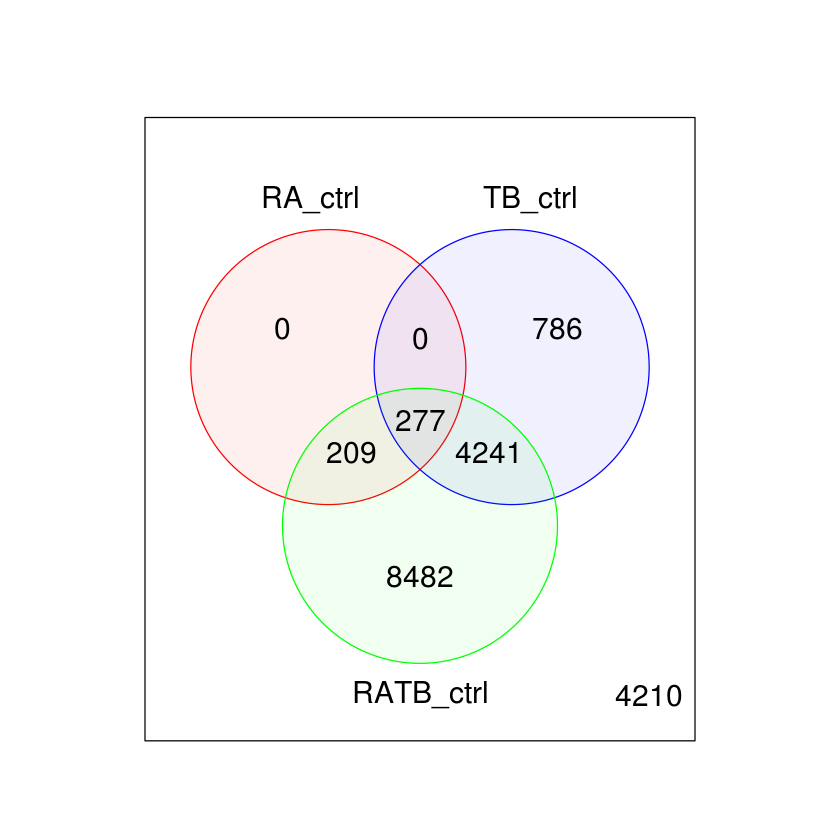

In [219]:
result <-decideTests(efit.contrast,adjust.method = "BH", p.value = 0.01)
summary(result)
vennDiagram(result,include="both",circle.col =c("red","blue","green") )

In [150]:
#results <- classifyTestsF(efit.contrast, p.value=0.01)
#summary(results)
#vennDiagram(results,include="both",circle.col =c("red","blue","green") )


In [205]:
top.table.all <- topTable(efit.contrast, coef=3, sort.by = "P", n = Inf)
head(top.table.all)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
UBC,13.93132,14.05675,243.1985,6.091876e-184,1.109026e-179,363.7257
NACA,11.96374,12.16934,221.6644,2.190517e-178,1.993918e-174,357.2376
FTL,14.60238,14.54319,209.1801,6.499166e-175,3.943910e-171,352.8809
TMSB4X,14.30197,14.45740,207.8176,1.600364e-174,7.283657e-171,352.3754
RACK1,13.22162,13.51898,200.8585,1.752805e-172,6.381964e-169,349.6940
RPS2,13.30712,13.77626,199.2539,5.295906e-172,1.606866e-168,349.0512


In [206]:
top.table <- top.table.all[top.table.all$adj.P.Val<0.01,]
dim(top.table)

[1] 13209     6

In [85]:
getwd()
sig341 <- read.table("/home/ubuntu/NLM_Reproducibility_Workshop/data/sig341Genes_inPaper.txt",header=F)
head(sig341)
dim(sig341)

[1] "/home/ubuntu/NLM_Reproducibility_Workshop/tb_and_arthritis/working"

V1
<fct>
DDX24
PPP1R16B
ALG13
HNRNPH1
USP36
CDKN2AIP


[1] 341   1

   Mode   FALSE    TRUE 
logical      21     320 

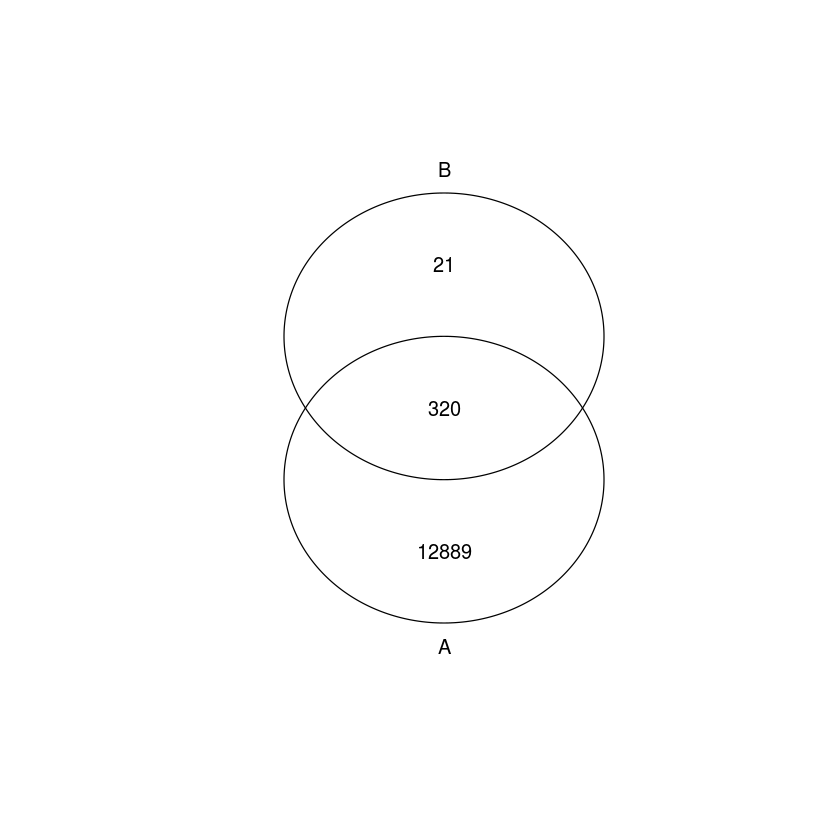

In [207]:
summary(as.character(sig341[,1])%in%rownames(top.table))

#top341 <- as.character(sig341[,1])
input2 <- list(rownames(top.table),top341)

tmp <- venn(input2)

In [212]:
## remove study1 to improve
design.limma2 <- model.matrix(~0+grps[-c(1:33)]+batches[-c(1:33)])
colnames(design.limma2) <- c('grpsHealthy','grpsRA','grpsTB', 'batches')
design.limma2

fit2 <- lmFit(merged.dataset.norm[,-c(1:33)], design.limma2)

contrast.matrix2=makeContrasts(grpsRA - grpsHealthy, grpsTB - grpsHealthy,
                              (grpsRA + grpsTB) - grpsHealthy, levels=design.limma2)
colnames(contrast.matrix2)=c("RA_ctrl","TB_ctrl","RATB_ctrl")
fit.contrast2=contrasts.fit(fit2,contrast.matrix2)
efit.contrast2=eBayes(fit.contrast2)

grpsHealthy,grpsRA,grpsTB,batches
1,0,0,2
1,0,0,2
1,0,0,2
1,0,0,2
1,0,0,2
1,0,0,2
1,0,0,2
1,0,0,2
1,0,0,2
1,0,0,2


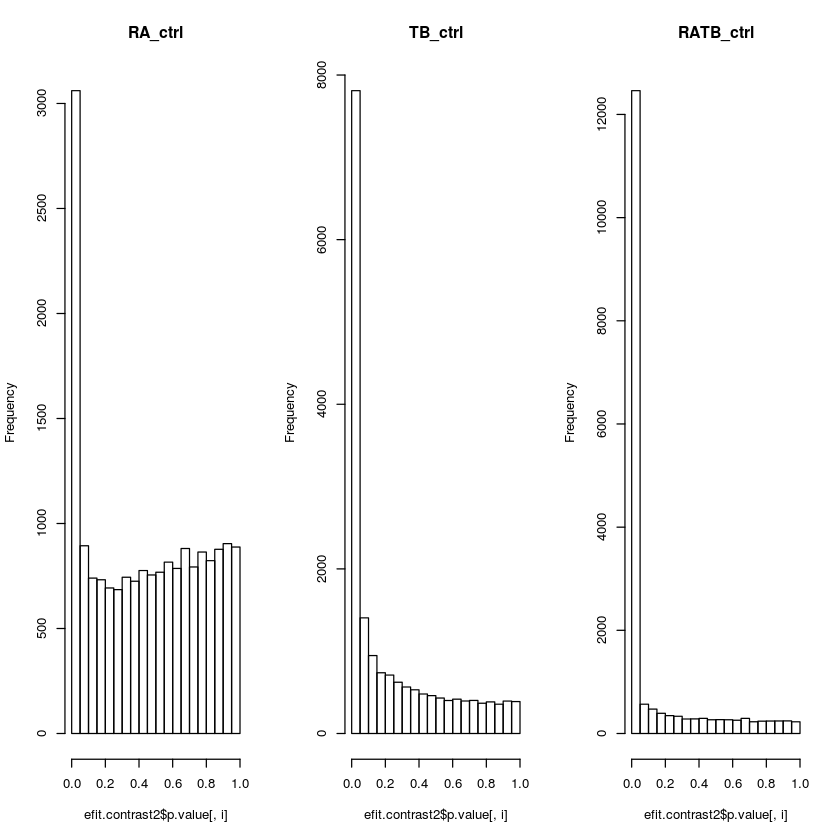

In [213]:
par(mfrow=c(1,3))
for (i in 1:ncol(efit.contrast2$p.value)){
  hist(efit.contrast2$p.value[,i],main=colnames(efit.contrast2$p.value)[i])
}

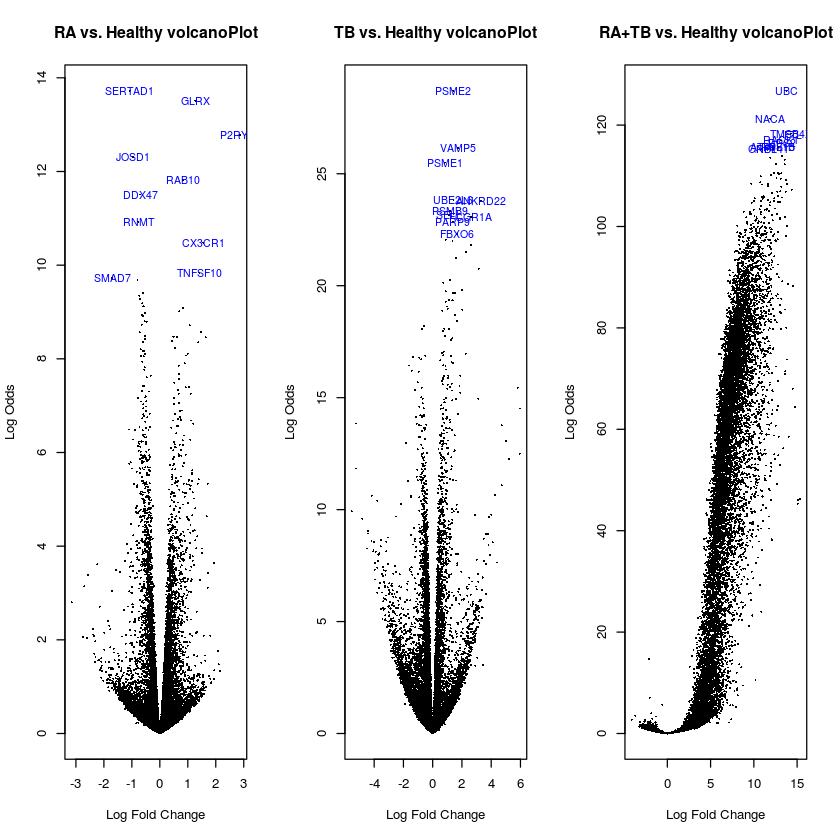

In [214]:
par(mfrow=c(1,3))
volcanoplot(efit.contrast2, coef=1, highlight=10,names=rownames(efit.contrast2), 
            xlab="Log Fold Change", ylab="Log Odds", pch=16,main="RA vs. Healthy volcanoPlot")
volcanoplot(efit.contrast2, coef=2, highlight=10,names=rownames(efit.contrast2), 
            xlab="Log Fold Change", ylab="Log Odds", pch=16,main="TB vs. Healthy volcanoPlot")
volcanoplot(efit.contrast2, coef=3, highlight=10,names=rownames(efit.contrast2), 
            xlab="Log Fold Change", ylab="Log Odds", pch=16,main="RA+TB vs. Healthy volcanoPlot")